# Visualisation des projections hydrologiques
Ici, nous allons "réutiliser" des fonctions que nous avons déjà utilisées afin d’examiner les résultats des modèles hydrologiques.

In [61]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

sns.set_context('paper')

### Charger les données
Tout d'abord, chargez les données historiques et simulées.

In [62]:
historical_data_file = Path(r'data/historical_data.csv')
historical = pd.read_csv(historical_data_file, index_col=0, header = [0, 1], parse_dates=[0], date_format='%Y-%m-%d')

# Chagement des colonnes pour qu'elles soient similaires à celles de projections
columns = historical.columns.to_frame(index=False)
columns.loc[:, 'Zone'] = columns.loc[:, 'Zone'].map(lambda x: x[0] + x[1:].lower())
columns.loc[:, 'Variables'] = columns.loc[:, 'Variables'].map(lambda x: {'P [mm]': 'pr', 'T [C]': 'tas', 'Hobs [mm]':'hobs', 'Hsim [mm]':'hsim'}[x])
historical.columns = pd.MultiIndex.from_frame(columns)
historical.head(4)

Zone             Q11b                                        Q12            \
Variables          pr       hsim      hobs        tas         pr      hsim   
1990-09-01  10.492857   0.000000  0.041793  23.413880   8.340541  0.000000   
1990-10-01  27.050000   0.000000  0.132855  18.827589  26.362162  0.000000   
1990-11-01  41.857143   1.625004  0.637774  15.145339  42.221622  1.160168   
1990-12-01  78.000000  21.968107  2.738655  12.706330  79.556757  6.549536   

Zone                                  Q14a            ...       Q4b  \
Variables       hobs        tas         pr      hsim  ...      hobs   
1990-09-01  0.022882  23.413880   9.329167  0.000000  ...  1.107172   
1990-10-01  0.028479  18.827589  26.420833  0.000000  ...  0.264993   
1990-11-01  0.324303  15.145339  33.166667  0.342953  ...  0.082315   
1990-12-01  1.729672  12.706330  71.850000  4.230383  ...  8.134774   

Zone                           Q7                                          Q8  \
Variables         tas          pr       hsim      hobs        tas          pr   
1990-09-01  23.509356   28.716541   0.000000  0.086771  22.598050   26.657143   
1990-10-01  17.065509   39.496241   0.000000  0.118819  16.201201   47.060714   
1990-11-01  12.983124   49.433083   1.002130  0.257325  12.148505   51.664286   
1990-12-01   9.451887  112.993985  13.191994  7.146044   9.057656  106.571429   

Zone                                      
Variables      hsim      hobs        tas  
1990-09-01  0.00000  0.085297  22.443770  
1990-10-01  0.00000  0.116800  16.088638  
1990-11-01  0.51940  0.252953  12.258947  
1990-12-01  9.78401  7.024635   9.357754  

[4 rows x 52 columns]

In [22]:
simulations_data_file = Path(r'hydrology/simulations.csv')
simulations = pd.read_csv(simulations_data_file, index_col=0, header = [0, 1, 2, 3], skiprows=[4], parse_dates=[0], date_format='%Y-%m-%d').loc[:'2099-12-31',:]
simulations.head(4)

Variable                                hsim  \
Experiment                             rcp45   
Zone                                    Q11b   
Code       CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
1960-10-01                          0.403479   
1960-11-01                          0.000000   
1960-12-01                          0.755466   
1961-01-01                          0.000000   

Variable                                       \
Experiment                                      
Zone                                            
Code       CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1   
1960-10-01                                0.0   
1960-11-01                                0.0   
1960-12-01                                0.0   
1961-01-01                                0.0   

Variable                                                      \
Experiment                                                     
Zone                                                           
Code       CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1   
1960-10-01                                          4.312296   
1960-11-01                                          0.321258   
1960-12-01                                          0.697225   
1961-01-01                                         15.379751   

Variable                                              \
Experiment                                             
Zone                                                   
Code       CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1   
1960-10-01                                  8.680618   
1960-11-01                                  1.512534   
1960-12-01                                  0.574763   
1961-01-01                                 20.555151   

Variable                                                  \
Experiment                                                 
Zone                                                       
Code       CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1   
1960-10-01                                      0.000000   
1960-11-01                                      8.402899   
1960-12-01                                      1.718750   
1961-01-01                                      1.215812   

Variable                                                \
Experiment                                               
Zone                                                     
Code       ICHEC-EC-EARTH_r12i1p1_CLMcom-CCLM4-8-17_v1   
1960-10-01                                    0.000000   
1960-11-01                                    0.780843   
1960-12-01                                   10.060933   
1961-01-01                                   33.230583   

Variable                                               \
Experiment                                              
Zone                                                    
Code       ICHEC-EC-EARTH_r12i1p1_MPI-CSC-REMO2009_v1   
1960-10-01                                   0.000000   
1960-11-01                                   1.297153   
1960-12-01                                   8.513257   
1961-01-01                                  39.612524   

Variable                                        \
Experiment                                       
Zone                                             
Code       ICHEC-EC-EARTH_r12i1p1_SMHI-RCA4_v1   
1960-10-01                            0.000000   
1960-11-01                            0.622082   
1960-12-01                            2.614584   
1961-01-01                           34.709818   

Variable                                           \
Experiment                                          
Zone                                                
Code       ICHEC-EC-EARTH_r1i1p1_KNMI-RACMO22T_v1   
1960-10-01                               0.000000   
1960-11-01                               0.000000   
1960-12-01                               0.000000   
1961-01-01                               1.985628   

Variable                       

### Traitement des données  
Maintenant que nous disposons des données, nous devons les organiser par colonnes et ajouter des informations qui seront utiles pour la visualisation (par exemple, l'année hydrologique ou le mois de l'année hydrologique).  

Ci-dessous, vous pouvez également voir les bassins versants qui ont déjà été simulés.

In [66]:
print('Bassins versants dispobinles:')
for bv in simulations.columns.get_level_values('Zone').unique():
    print(bv)

Bassins versants dispobinles:
Q11b
Q12


In [78]:
hydrological_year_start = 9

choice = ('hsim', 'rcp85', 'Q12')

# Définition d'une fonction "lambda" pour calculer l'année hydrologique
hydrological_year_function = lambda x: f'{x.year}/{str(x.year+1)[-2:]}' if x.month>=hydrological_year_start else f'{x.year-1}/{str(x.year)[-2:]}'

# Définition d'une fonction "lambda" pour calculer le mois de l'année hydrologique
hydrological_month_function = lambda x: (x.month - hydrological_year_start) % 12 + 1

# Définition d'une fonction "lambda" pour calculer la décennie (hydrologique)
hydrological_decade = lambda x: x[:3] + '0'


simulations_stacked = simulations.loc[:, choice].stack().reset_index()
simulations_stacked.columns = ['Date', 'Code', 'Hsim [mm]']
simulations_stacked.index = pd.DatetimeIndex(simulations_stacked.loc[:, 'Date'])

simulations_stacked.loc[:, 'Mois'] = simulations_stacked.loc[:, 'Date'].dt.month
simulations_stacked.loc[:, 'Année hydrologique'] = simulations_stacked.loc[:, 'Date'].map(hydrological_year_function)
simulations_stacked.loc[:, "Mois de l'année hydrologique"] = simulations_stacked.loc[:, 'Date'].map(hydrological_month_function) 
simulations_stacked.loc[:, "Décennie"] = simulations_stacked.loc[:, 'Année hydrologique'].map(hydrological_decade) 

simulations_stacked

,Date,Code,Hsim [mm],Mois,Année hydrologique,Mois de l'année hydrologique,Décennie
Date,,,,,,,
1960-10-01,1960-10-01,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,0.000000e+00,10,1960/61,2,1960
1960-10-01,1960-10-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,7.040560e+00,10,1960/61,2,1960
1960-10-01,1960-10-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,6.990576e+00,10,1960/61,2,1960
1960-10-01,1960-10-01,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,0.000000e+00,10,1960/61,2,1960
1960-10-01,1960-10-01,ICHEC-EC-EARTH_r12i1p1_CLMcom-CCLM4-8-17_v1,0.000000e+00,10,1960/61,2,1960
...,...,...,...,...,...,...,...
2099-12-01,2099-12-01,MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009_v1,3.481372e-14,12,2099/00,4,2090
2099-12-01,2099-12-01,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,2.212754e-14,12,2099/00,4,2090
2099-12-01,2099-12-01,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,4.036960e+00,12,2099/00,4,2090


### Graphique d'évolution saisonnière  
Un graphique que nous pouvons utiliser pour la validation (en superposant les observations historiques) et pour l’analyse des évolutions à long terme.  

Dans ce cas, il semble que la disponibilité en eau diminuera de manière significative.  
Elle surviendra également plus tard dans l’année.

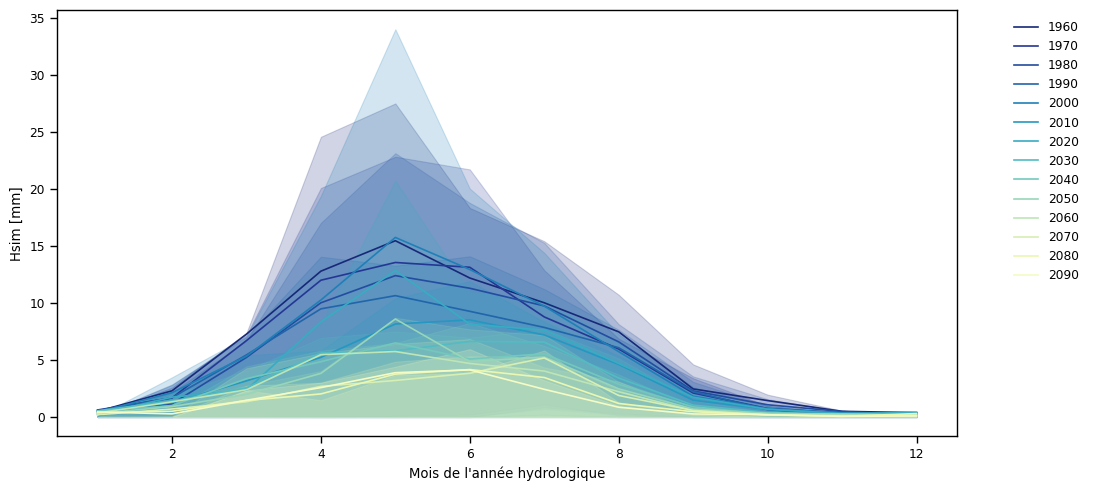

In [83]:
plt.figure(figsize=(11, 5))
ax = sns.lineplot(data=simulations_stacked, x="Mois de l'année hydrologique", y='Hsim [mm]', hue='Décennie', errorbar=('pi', 60), palette='YlGnBu_r')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()

### Graphique d'évolution temporelle (par modèle de changement climatique)  
Ici, nous pouvons observer les données **brutes** pour chacun des modèles considérés.  

L’interprétation en est difficile.

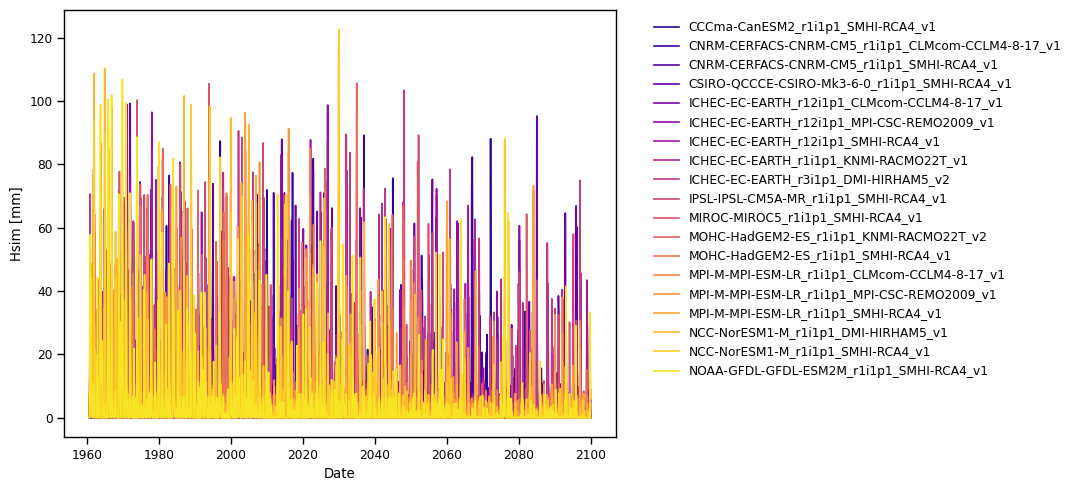

In [85]:
plt.figure(figsize=(11, 5))
ax = sns.lineplot(data=simulations_stacked, x="Date", y='Hsim [mm]', hue='Code', errorbar=('pi', 60), palette='plasma')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()

### Graphique d'évolution temporelle lissée (par modèle de changement climatique)  
L’interprétation devient beaucoup plus aisée lorsque nous appliquons une moyenne mobile (comme cela a été fait précédemment).  

Il est à noter que, dans cet exemple simplifié, la moyenne n’a pas été calculée par année hydrologique.

In [81]:
smooth =  simulations.loc[:, choice].resample('YS').mean().rolling(window=20, center=True).mean()

smooth_stacked = smooth.stack().reset_index()
smooth_stacked.columns = ['Date', 'Code', 'Hsim [mm]']
smooth_stacked.index = pd.DatetimeIndex(smooth_stacked.loc[:, 'Date'])

smooth_stacked.loc[:, 'Mois'] = smooth_stacked.loc[:, 'Date'].dt.month
smooth_stacked.loc[:, 'Année hydrologique'] = smooth_stacked.loc[:, 'Date'].map(hydrological_year_function)
smooth_stacked.loc[:, "Mois de l'année hydrologique"] = smooth_stacked.loc[:, 'Date'].map(hydrological_month_function) 
smooth_stacked.loc[:, "Décennie"] = smooth_stacked.loc[:, 'Année hydrologique'].map(hydrological_decade) 

smooth_stacked

,Date,Code,Hsim [mm],Mois,Année hydrologique,Mois de l'année hydrologique,Décennie
Date,,,,,,,
1970-01-01,1970-01-01,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,5.116507,1,1969/70,5,1960
1970-01-01,1970-01-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,2.929382,1,1969/70,5,1960
1970-01-01,1970-01-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,3.310441,1,1969/70,5,1960
1970-01-01,1970-01-01,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,4.834052,1,1969/70,5,1960
1970-01-01,1970-01-01,ICHEC-EC-EARTH_r12i1p1_CLMcom-CCLM4-8-17_v1,4.421872,1,1969/70,5,1960
...,...,...,...,...,...,...,...
2090-01-01,2090-01-01,MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009_v1,1.960907,1,2089/90,5,2080
2090-01-01,2090-01-01,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,1.715985,1,2089/90,5,2080
2090-01-01,2090-01-01,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,0.449045,1,2089/90,5,2080


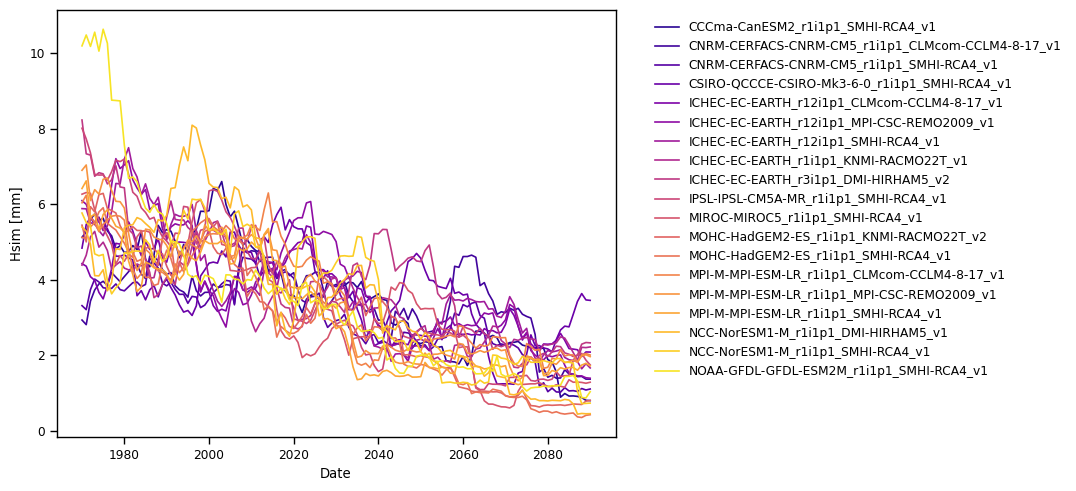

In [86]:
plt.figure(figsize=(11, 5))
ax = sns.lineplot(data=smooth_stacked, x="Date", y='Hsim [mm]', hue='Code', errorbar=('pi', 60), palette='plasma')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()